In [1]:
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d
from matplotlib.pyplot import *
from matplotlib import cm
from numpy import *
style.use('classic')

# Solución de la Ecuación de Laplace en rectángulo:

La solución de la ecuación de Laplace 2D en coordenadas cartesianas,

$$
\frac{\partial^2\psi}{\partial x^2}+\frac{\partial^2\psi}{\partial y^2} = 0
$$
en el dominio
$$
x \in (0,1), \qquad y \in (0,2),
$$
y con las condiciones de borde 

$$
\qquad \psi(x,2)=x(1-x), \qquad\psi(0,y)=\psi(1,y) = \psi(x,0) = 0,
$$

es dada por

$$
\psi(x,y)=\frac{8}{\pi^3}\sum_{k=1}^{\infty}\frac{\sin((2k-1) \pi x)}{(2k-1)^3}\frac{\sinh((2k-1)\pi y)}{\sinh(2\pi (2k-1))}.
$$

In [2]:
def Psi_k(k,x,y):
    term_psi = (8./pi**3)*(sin((2.*k-1.)*pi*x)/(2.*k-1.)**3)*(sinh((2.*k-1.)*pi*y)/sinh(2.*pi*(2.*k-1.)))
    return term_psi

def SnPsi(n,x,y):
    SnPsi = 0.
    for k in range(1,n+1):
        SnPsi += Psi_k(k,x,y)
    return SnPsi

In [3]:
x = linspace(0,1,200) #Definiendo el dominio en x
y = linspace(0,2,200) #Definiendo el dominio en y
X,Y = meshgrid(x, y) #Formando la grilla x,y
m = 30 #número máximo en el que se cortará la serie
Z = SnPsi(m,X,Y) #Evaluando el valor del potencial

A continuación, un gráfico en colores en el dominio.

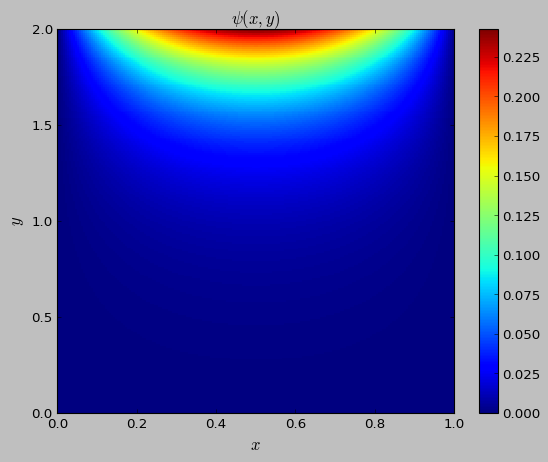

In [4]:
pcolormesh(X, Y, Z)
xlabel('$x$',fontsize=15)
ylabel('$y$',fontsize=15)
title('$\psi(x,y)$',fontsize=15)
colorbar()

Y ahora un gráfico de superficie y en colores.

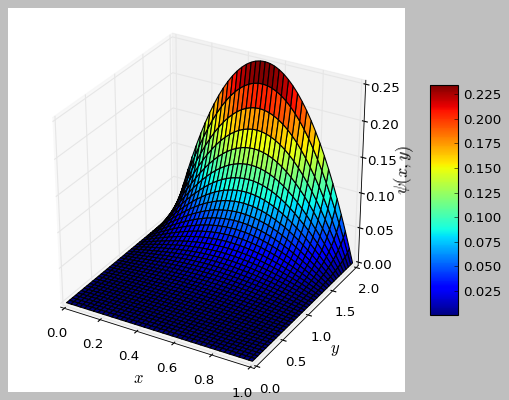

In [5]:
fig = figure(figsize=(8,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, rstride=5, cstride=5, alpha=1)
fig.colorbar(surf, shrink=0.6, aspect=8) #Se agrega barra de colores
ax.set_xlabel('$x$',fontsize=15)
ax.set_ylabel('$y$',fontsize=15)
ax.set_zlabel('$\psi(x,y)$',fontsize=15)
show()